In [1]:
from scipy.stats import norm, t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from Monte_Carlo_utils import *

In [178]:
end = dt.datetime.now()
start = end - dt.timedelta(days=365)
stockData, returns = get_data('JPM', start, end)
meanReturns, covMatrix = get_statistics(returns)

[*********************100%%**********************]  1 of 1 completed


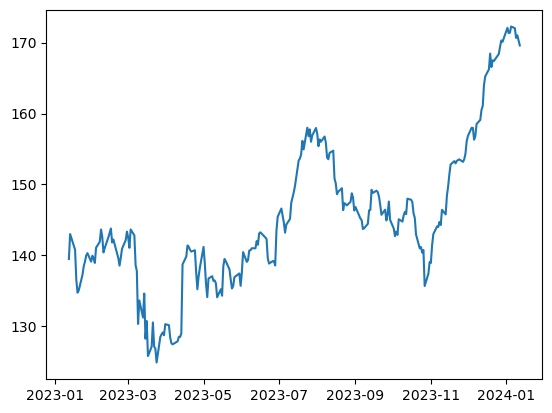

In [179]:
plt.plot(stockData)
plt.show()

https://finance.yahoo.com/quote/JPM240315C00130000?p=JPM240315C00130000

In [180]:
market = 40.83

In [290]:
T = dt.datetime(2024, 3, 15)
tau = (T-dt.datetime.now()).days
S = stockData.iloc[-1].squeeze()
K = 130
vol = np.sqrt(covMatrix).squeeze()
r = 0.055/365

In [291]:
def BSM(tau, S, K, vol, r):
    d1 = (np.log(S/K) + tau * (r + vol ** 2 / 2)) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return (S * norm.cdf(d1) - np.exp(- r * tau) * K * norm.cdf(d2)).squeeze()

In [292]:
BSMvalue = BSM(tau, S, K, vol, r)
print("BSM value = ${}".format(BSMvalue))

BSM value = $40.82088527798891


Simple Model: BSM model with 

In [295]:
def mc_stock(nsims, nsteps, S, mu, tau, vol):
    dt = tau/nsteps
    theta = mu - vol ** 2 /2
    Z = norm.rvs(loc=0, scale=1, size = (nsteps, nsims))
    dlnS = theta * dt + vol * np.sqrt(dt) * Z
    lnS = np.log(S) + np.cumsum(dlnS, axis=0)
    S = np.exp(lnS)
    return S

In [296]:
nsims = 10000
nsteps = 1000
simulation = mc_stock(nsims = nsims, nsteps = nsteps, S = S, mu=r, tau=tau, vol=vol)
ts = np.linspace(0, tau, nsteps)

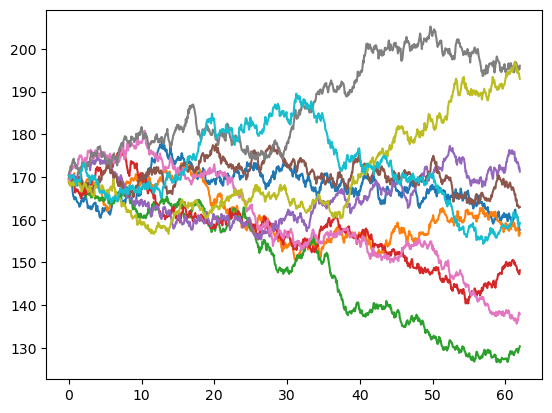

In [297]:
plt.plot(ts, simulation[:,:10])
plt.show()

In [298]:
def mc_european_call(simulation, K, r, tau):
    T, N = simulation.shape
    finals = simulation[-1, :]
    values = np.exp(- r * tau) * np.maximum(finals-K, 0)
    se = np.std(values/np.sqrt(N))
    return np.mean(values), se, values
        

In [266]:
mccall, se, values = mc_european_call(simulation, K, r, tau)

In [303]:
print("market value = ", market)
print("BSM value = ", BSMvalue)
print("mcvalue = ", mccall,"+/-", se)


market value =  40.83
BSM value =  40.82088527798891
mcvalue =  40.80617749254769 +/- 0.1754835451011077


[]

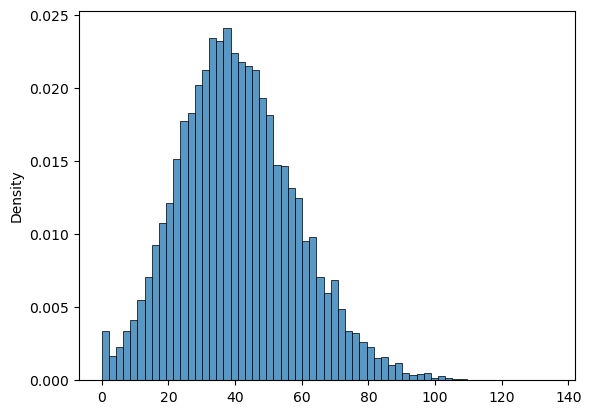

In [329]:
sns.histplot(values, stat='density')
plt.plot()

In [317]:
def mc_stock_anti(nsims, nsteps, S, mu, tau, vol):
    dt = tau/nsteps
    Z = norm.rvs(size = (nsteps, nsims))
    theta = mu - vol ** 2 / 2
    dlnS1 = theta * dt + vol * np.sqrt(dt) * Z
    dlnS2 = theta * dt - vol * np.sqrt(dt) * Z
    lnS1 = np.log(S) + np.cumsum(dlnS1, axis=0)
    lnS2 = np.log(S) + np.cumsum(dlnS2, axis=0)
    S1 = np.exp(lnS1)
    S2 = np.exp(lnS2)
    return np.concatenate([S1, S2], axis=1)

In [318]:
simulation2, simulation2_anti = mc_stock_anti(nsims, nsteps, S, r, tau, vol)

In [323]:
def mc_european_call_anti(simulation, simulation_anti, K, r, tau):
    T, N = simulation.shape
    finals = simulation[-1, :]
    finals_anti = simulation_anti[-1, :]
    values = 0.5 * np.exp(- r * tau) * (np.maximum(finals-K, 0) + np.maximum(finals_anti-K, 0))
    se = np.std(values/np.sqrt(N))
    return np.mean(values), se, values
        

In [325]:
mccall2, se2, values2 = mc_european_call_anti(simulation2, simulation2_anti, K, r, tau)

In [327]:
mccall2, se2

(40.8316442492005, 0.013985969467819982)

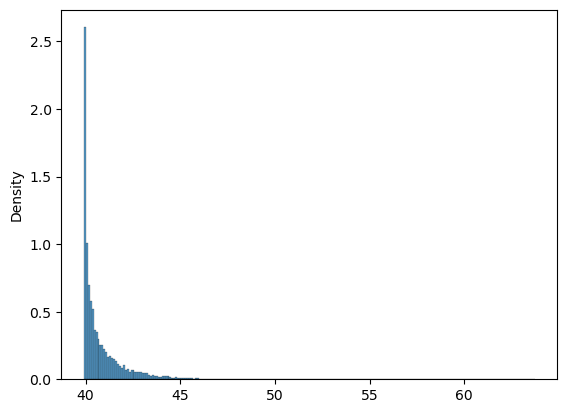

In [331]:
sns.histplot(values2, stat='density')
plt.show()

In [326]:
def mc_stock_daily(nsims, nsteps, S, mu, tau, vol):
    dt = tau/nsteps
    Z = mu * dt + vol * np.sqrt(dt) * norm.rvs(loc=0, scale=1, size = (nsteps, nsims))
    S = S * np.cumprod(1 + Z, axis = 0)
    return S

In [314]:
simulation3 = mc_stock_daily(nsims, nsteps, S, r, tau, vol)

In [315]:
mccall3, se3, values3 = mc_european_call(simulation3, K, r, tau)

In [316]:
mccall3, se3

(40.888816005016295, 0.1751242268548717)

In [252]:
X1 = np.random.normal(size = 1000)
X2 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X1
X3 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X2
X4 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X3
X5 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X4
X6 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X5
X7 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X6
X8 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X7
X9 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X8
X10 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X9
X11 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X10
X12 = np.random.normal(scale=0.2, size = 1000) + 0.8 * X11
Data = np.array([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12])


In [254]:
Data.shape

(12, 1000)

In [261]:
C = np.cov(Data)
pd.DataFrame(C)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.020919,0.810549,0.648781,0.501586,0.401403,0.331301,0.260399,0.202257,0.169023,0.124823,0.116450,0.081736
1,0.810549,0.684942,0.549272,0.424570,0.339514,0.280376,0.223027,0.171877,0.143618,0.105318,0.098131,0.069527
2,0.648781,0.549272,0.479177,0.371304,0.298417,0.246218,0.194173,0.150406,0.126859,0.093723,0.085617,0.061625
3,0.501586,0.424570,0.371304,0.327994,0.263825,0.218632,0.170825,0.132374,0.109882,0.081749,0.073240,0.054630
4,0.401403,0.339514,0.298417,0.263825,0.253481,0.208421,0.165354,0.129949,0.108791,0.081276,0.073070,0.056498
5,0.331301,0.280376,0.246218,0.218632,0.208421,0.212649,0.170082,0.134808,0.111442,0.085021,0.075698,0.059118
6,0.260399,0.223027,0.194173,0.170825,0.165354,0.170082,0.174735,0.138476,0.114436,0.087270,0.074958,0.058940
7,0.202257,0.171877,0.150406,0.132374,0.129949,0.134808,0.138476,0.150779,0.124282,0.095909,0.080058,0.063657
8,0.169023,0.143618,0.126859,0.109882,0.108791,0.111442,0.114436,0.124282,0.138571,0.105591,0.085439,0.066492
9,0.124823,0.105318,0.093723,0.081749,0.081276,0.085021,0.087270,0.095909,0.105591,0.119782,0.098611,0.079785


In [262]:
U, V, D = np.linalg.svd(C)

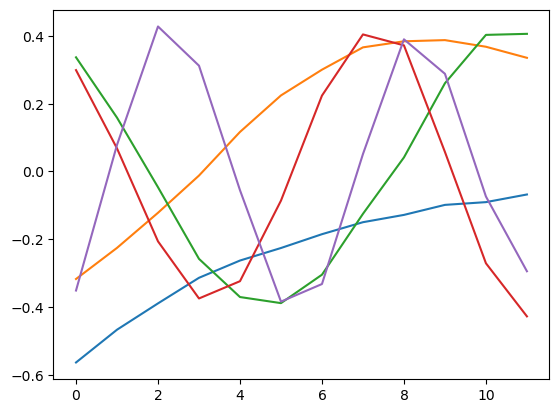

In [269]:
plt.plot(U[:, :5])

In [271]:
from scipy.stats import uniform_direction

In [272]:
position = uniform_direction.rvs(dim=12)

In [273]:
print(position)

[-0.24457622 -0.07315783 -0.29496366 -0.42159345  0.38336256 -0.05700625
 -0.19532291  0.44670912 -0.06101072  0.18881775  0.01481182  0.49251937]


In [277]:
H = np.zeros(shape=(12, 5))
indices = [0, 3, 6, 8, 11]
for i, j in enumerate(indices):
    H[j, i] = 1
H

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
U @ np.linalg.inv((H.T @ U)) * 